# Validation of a classification problem

## Using diabetes dataset (https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 8 Features:
- **Pregnancies**
Number of times pregnant
- **Glucose**
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**
Diastolic blood pressure (mm Hg)
- **SkinThickness**
Triceps skin fold thickness (mm)
- **Insulin**
2-Hour serum insulin (mu U/ml)
- **BMI**
Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**
Diabetes pedigree function
- **Age**
Age (years)
- **Outcome**
Class variable (0 or 1)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score

In [15]:
Data = pd.read_csv('DiabetesDataset.csv', header = None)
X = Data.iloc[:,:-1].copy()
Y = Data.iloc[:,-1].copy()
display(X)
display(Y)

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [16]:
X.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


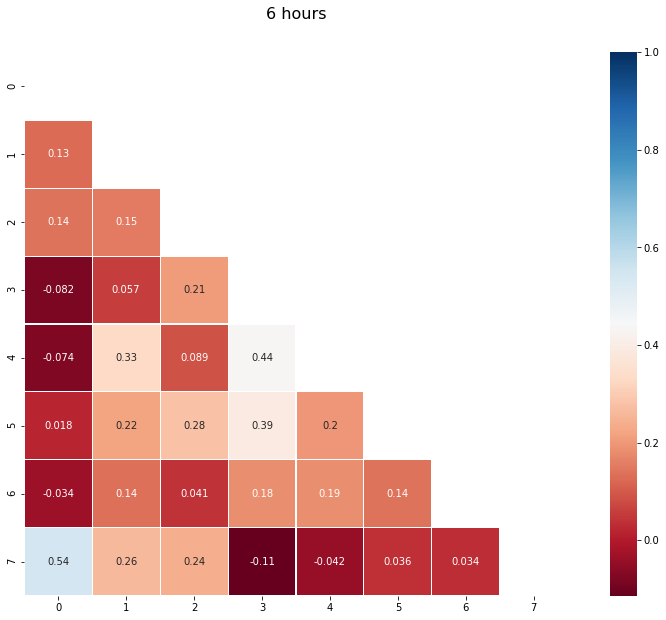

In [17]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'6 hours', y=1.05, size=16)

mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(X.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

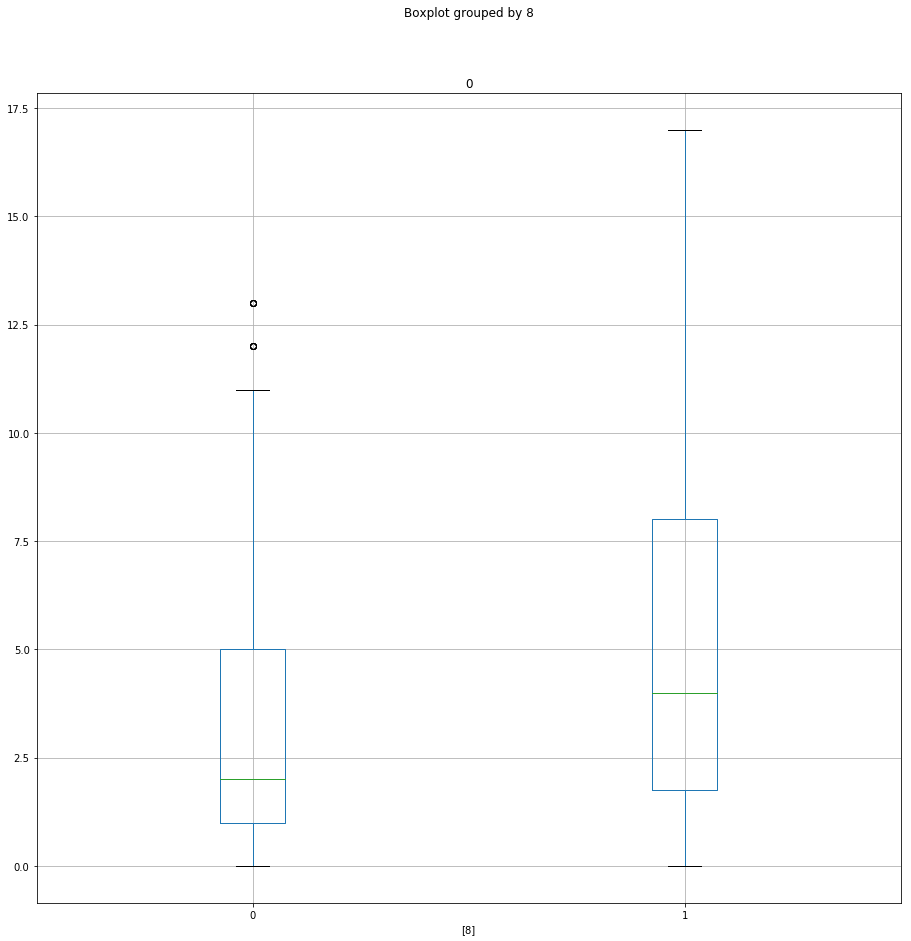

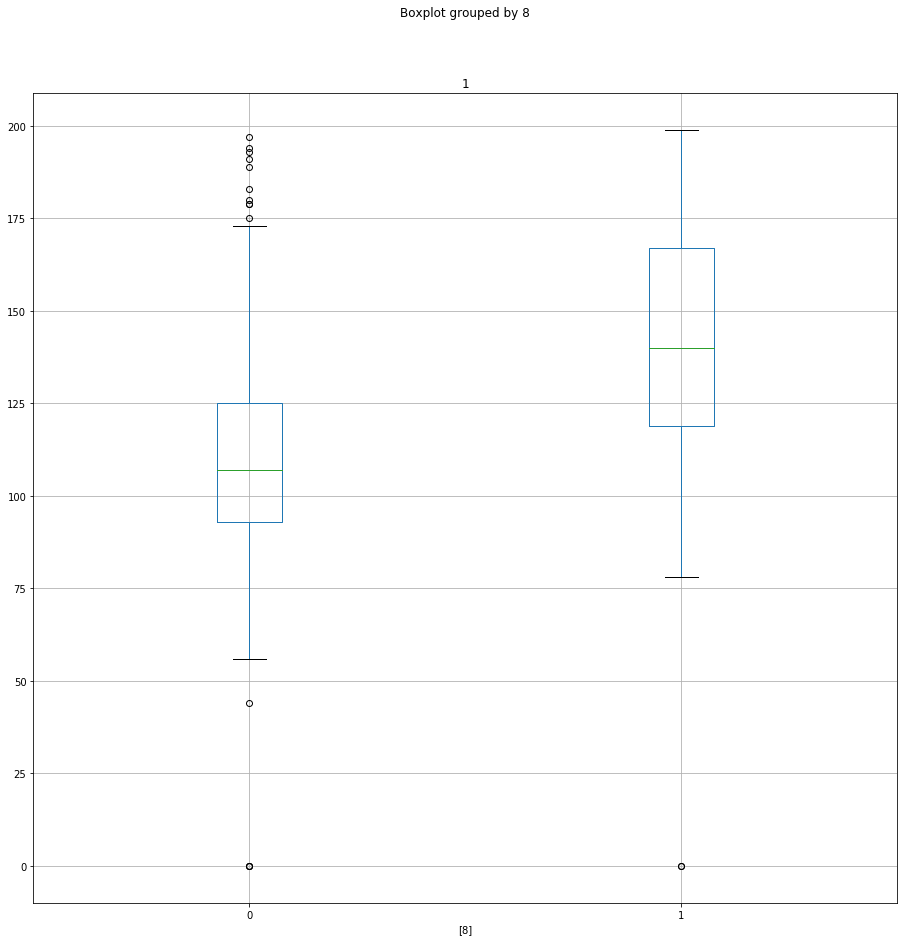

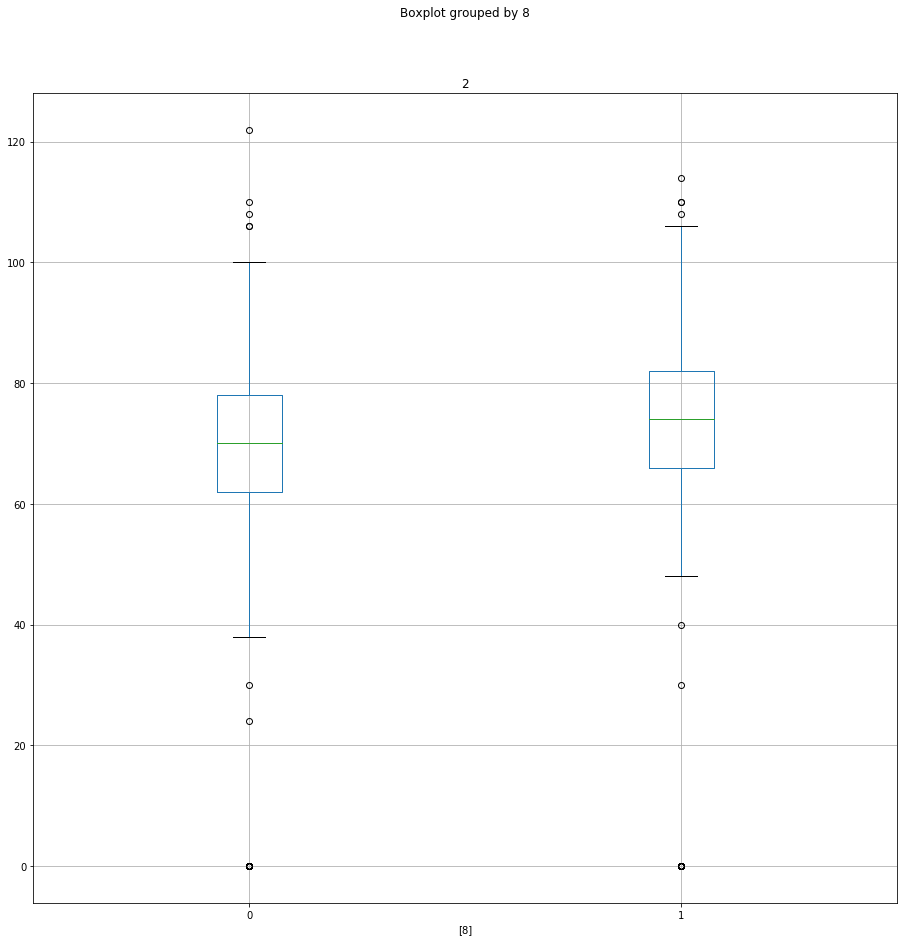

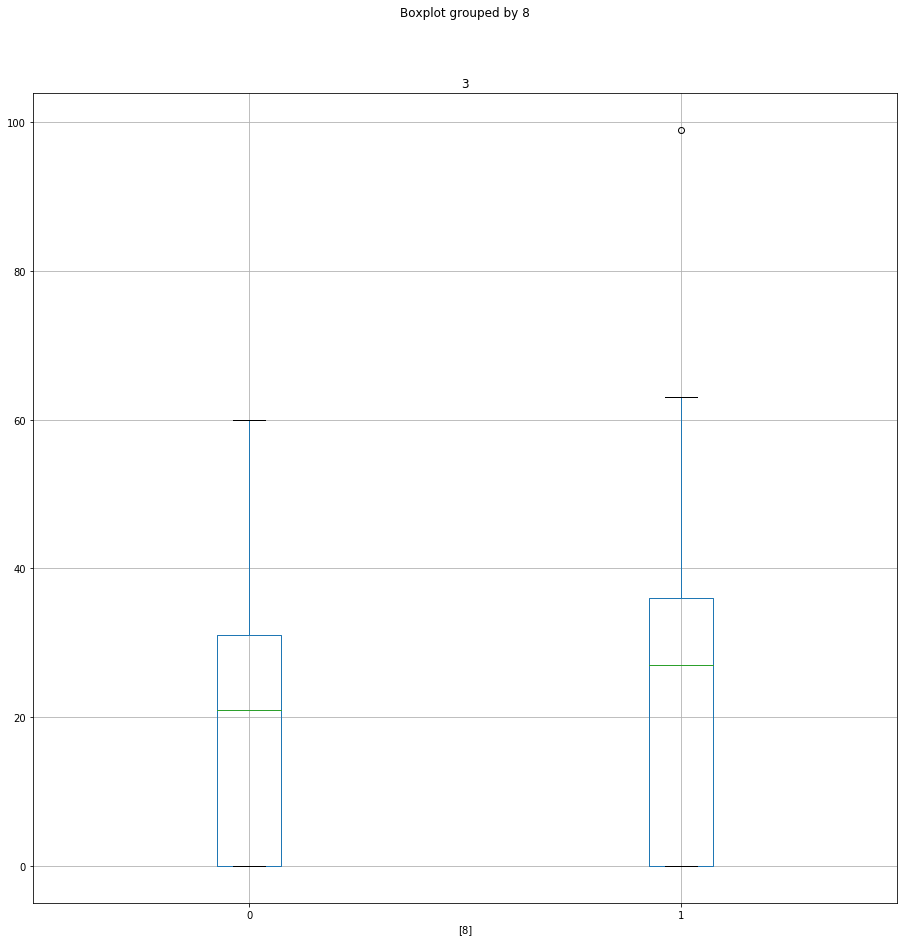

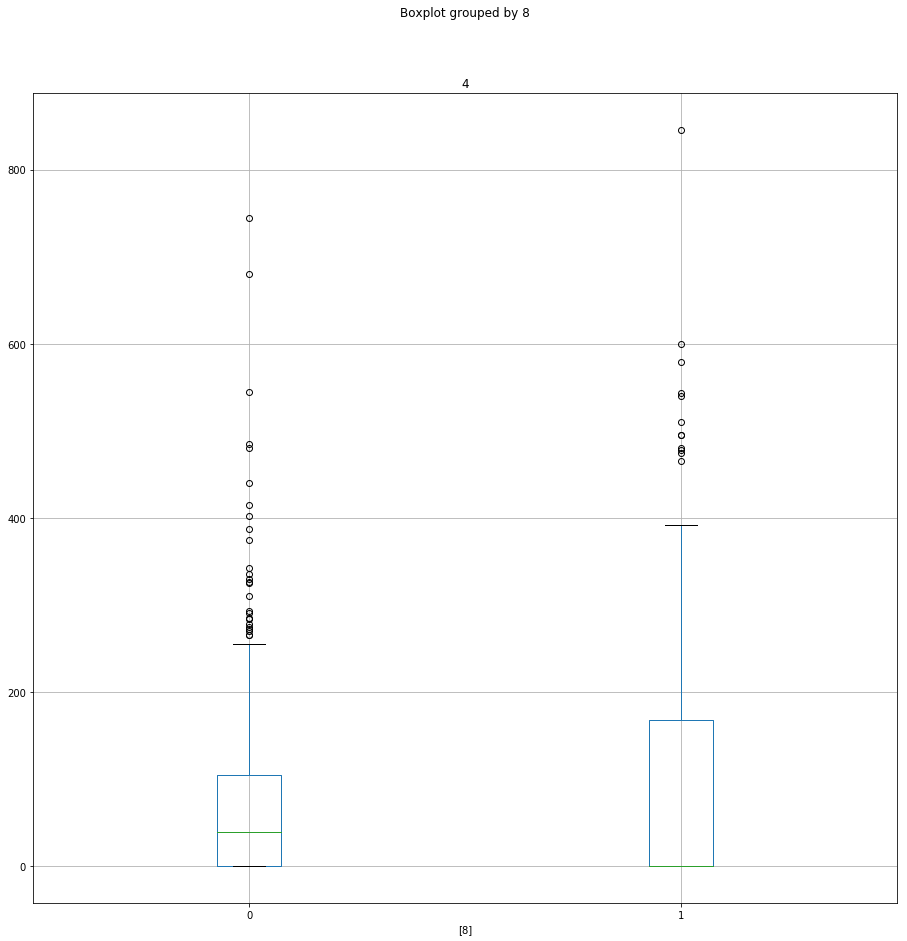

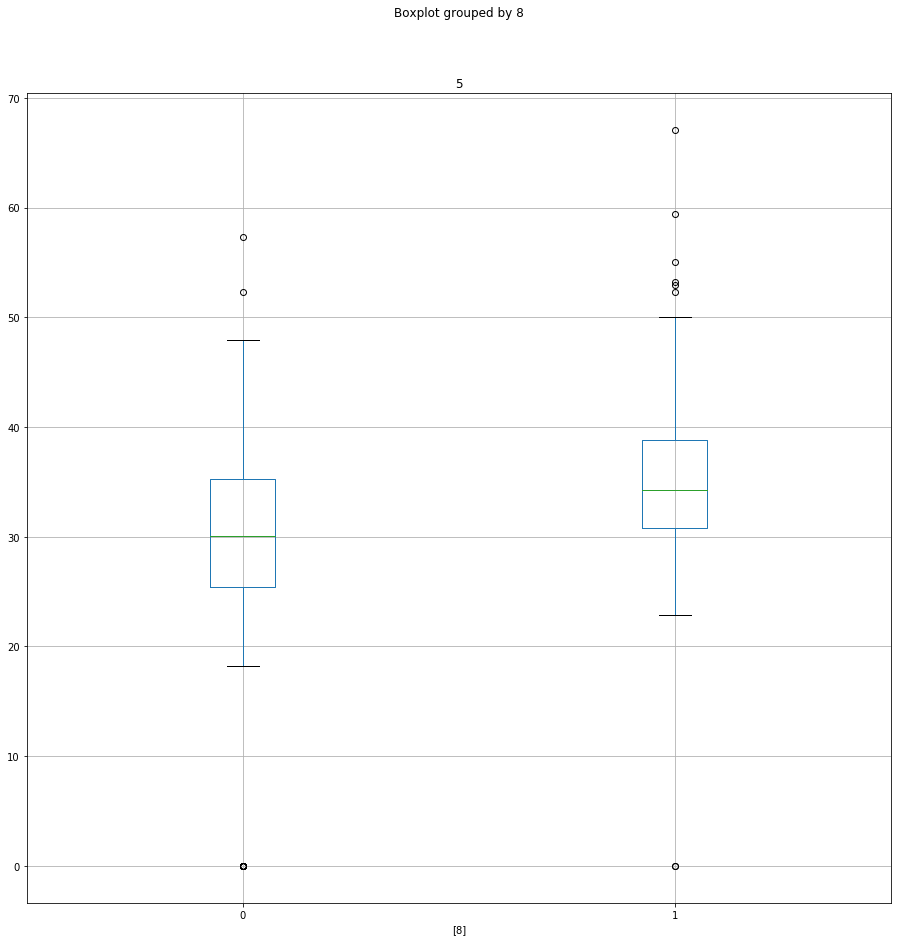

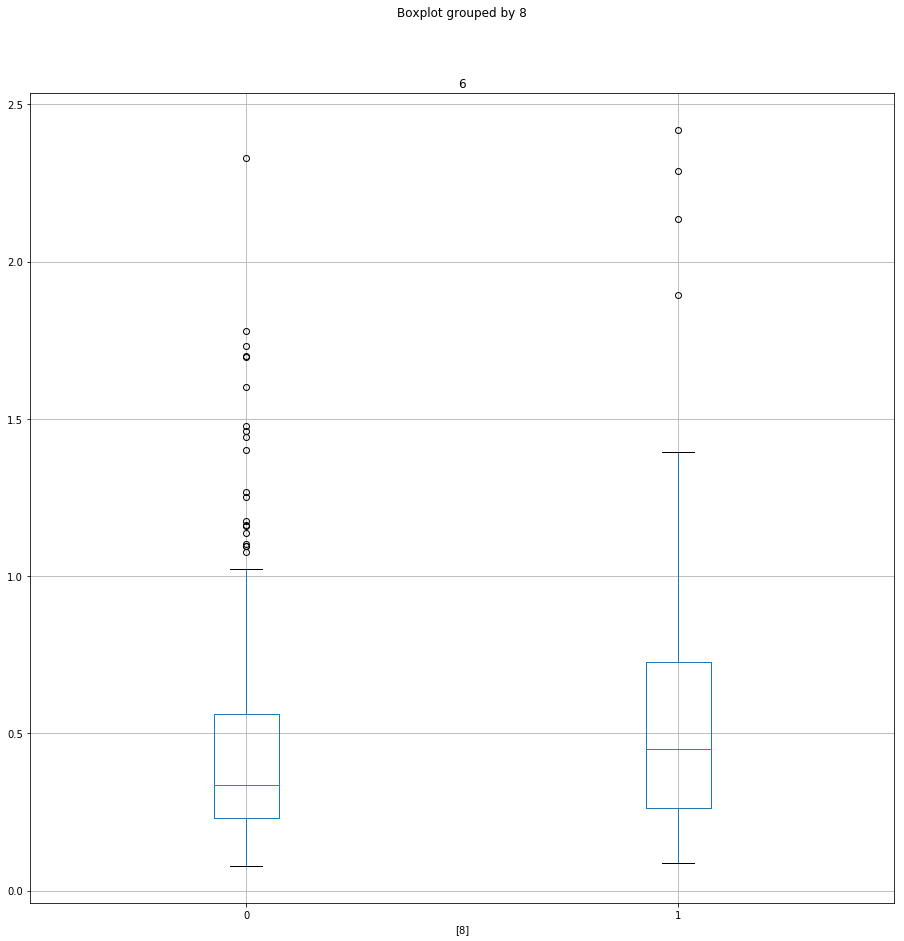

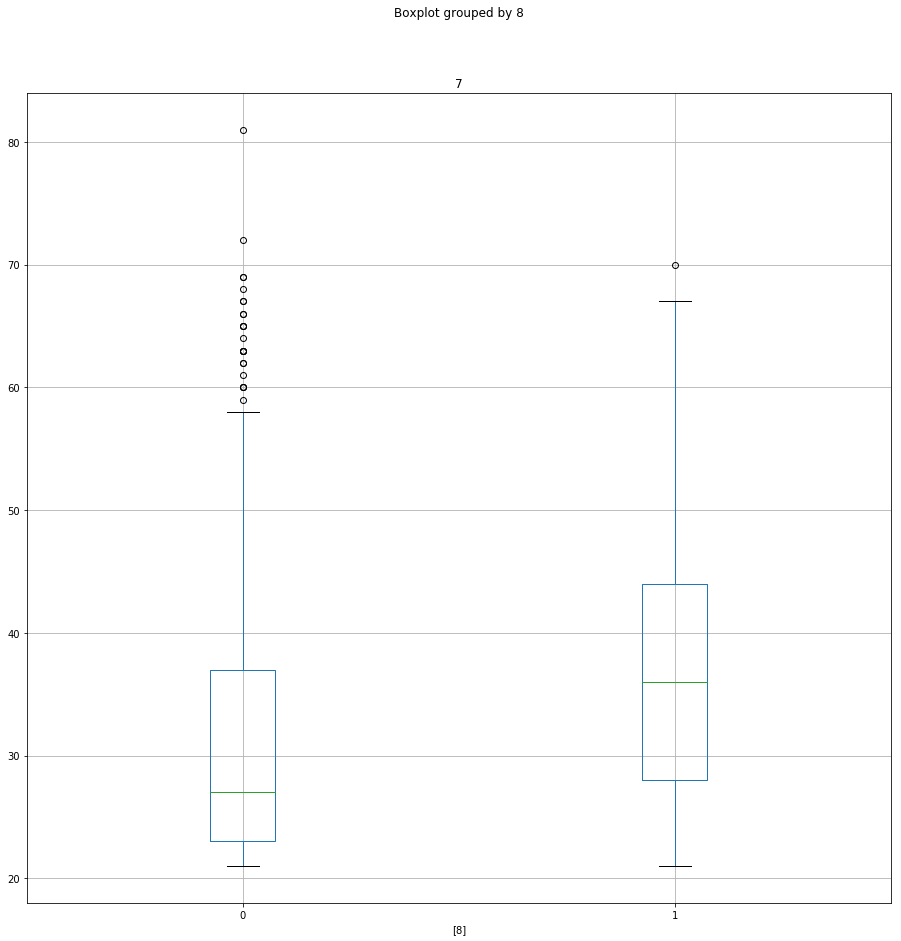

In [18]:
for i in range(8):
    Data.iloc[:,[i,8]].boxplot(by=8, figsize=(15,15))

# Crossvalidation

## Numpy has a function to create the folds called KFold. However this funtion only picks from the the dataset data randonmly regardless the number of elements of each class or the label. So, you can finish with a fold with just one class.

## That's why we have created our own KFold function, that asigns samples to the folds based on the labels. Starts with the class 0, asigning equal quantity of samples of that class in all the folds, then class 1, then class 2, ...

In [19]:
def Kfold(y, nfolds = 10):
    uniquetags = np.unique(y)
    indices = [np.empty(0,)] * nfolds
    globaladd = 0
    for j in range(len(uniquetags)):
        inds = np.where(uniquetags[j]==y)[0]
        count = np.sum(uniquetags[j]==y)
        value_per_fold = int(count/nfolds)

        indrandom = np.random.permutation(count)
        inds = inds[indrandom]

        for i in range(nfolds):
            indices[i] = np.concatenate((indices[i], inds[i*value_per_fold:(i+1)*value_per_fold]), axis=0)
        
        lack = count - value_per_fold*nfolds

        indlack = value_per_fold*nfolds
        for i in range(lack):
            indices[globaladd] = np.append(indices[globaladd], inds[indlack+i])
            globaladd = globaladd + 1

            if globaladd == 5:
                globaladd = 0

    output = []  
    for i in range(nfolds):
        output.append([ np.concatenate((np.array(indices)[np.where(np.arange(nfolds) != i)[0]])).astype(int) ,indices[i].astype(int)])

    return output

In [20]:
for train_index, test_index in Kfold(Y.values,10):
    print("---------------------------------------------------------------------------") 
    print("---------------------------------------------------------------------------") 
    print("TRAIN: folds", train_index) 
    print("---------------------------------------------------------------------------") 
    print("TEST: Test fold", test_index)
    print("---------------------------------------------------------------------------") 
    print("---------------------------------------------------------------------------") 

---------------------------------------------------------------------------
---------------------------------------------------------------------------
TRAIN: folds [ 97  69 474 144 626 752 517 508 226 379 704 168 334 735 607  54  62 756
  50 726  58 241 483 617  36 589 331 374 299  40 297 467  90 157 669 551
 225 511 529 383 381 203  79 512 462  35 246 108 446 410 406 485 766 242
 235 730 132  61 339 484 213 283 695  17 498 110  19 237 177 748 152 321
 309 322 750 207 100  26 503 657 552 311 104 174 591 163  80 389 688 141
 234  55 341 437 423 335 371 583 210 263  82  21 700  10 496 358 494  71
 495  18 393 106 153 680 582  28 597 149 434 351 530 643  27 609 505 258
 367 288 332 541 293 221  13 712 655 236  23 209 219 255 192 238  25 280
 387  39 259  72  24 678 199 444 417 435 588 739  32 107 327 602 333 373
   3  92 500 267  44 320 692 720 249 122 113 459  65 585 344 453 342 650
  59 182 641 278 105 548 631  41 632 180 644 745 166 527 176 191 126 574
 365 616 449 718 274  20 537 615

## KNN Algorithm

In [21]:
def KnnRegression(Xdatabase, Ydatabase, k, XtoPredict):  
    M = XtoPredict.shape[0]
    
    NClasses = len(np.unique(Ydatabase))
    Yout = np.zeros(shape=(XtoPredict.shape[0], NClasses))
    
    for i in range(0,M):
        distance = np.linalg.norm(XtoPredict[i]-Xdatabase,axis=1)
        indices = np.argsort(distance)[:k]
        Yout[i, :]  = np.histogram(Ydatabase[indices], bins=range(NClasses + 1))[0] / k
    
    return Yout

In [22]:
Xnp = X.values
Ynp = Y.values
KnnRegression(Xnp, Ynp, 1, Xnp)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Let's separate first the training set and validation set from the testing

In [23]:
count = Xnp.shape[0]
ind = np.random.permutation(count)
print('Size: ',count)
print('Random indices: ', ind)

Size:  768
Random indices:  [743 474 501 503 390 166 581 669 318 208 443   9 741 399 484 487 672 239
 244 231 455 587 477 756 629 116 696 699 624 378 254 215 724 728 132 396
 680 605 329 618 119 475 667 293 217 150 342 406 738 122 193 617  35 259
 524 637 565 352 456 339 238 114  24 750 658 636  59 182 275 676  70 650
 118 543 666 678 757 717 762  73  30 570 457 315 387 526 711 488 758 598
 226 159 103 191 245 402 266  13 638  18 264 230 409 133 674  20 241  39
  32 219 425 432 327 748 337 731 681 282 268 220 466  31 361 493 428 702
   5 725 165  10 687 665  58 286 620 599 644 177 668 604 169 258 288 749
 736  95 708 234 404 715 651 468 168  60 195  17 754 232  74  21 441 190
 713 408 313 573 733 578 274 292 746 480  11 491 237 664 742 463 287 594
 229 440 312 614 250 751 423 529  22 187 571 695 476 575 174 180 294 557
 214  62  68 611 506 350 137 536 298 726 374 386 262  25 642 176  84 212
 157 284 634 384 489 269 465 110 547 427 530 608 388 537 705 336 479  29
 410  98 445 211  93 25

In [24]:
Indtrain_val = ind[:int((80/100)*count)]
Indtest = ind[int((80/100)*count):]

In [25]:
Xtrain_val = Xnp[Indtrain_val, :]
Ytrain_val = Ynp[Indtrain_val]
Xtest = Xnp[Indtest, :]
Ytest = Ynp[Indtest]

print(Ytrain_val)
print(Ytest)

[1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 

In [29]:
for K in [1, 2, 5, 10, 20, 30, 50, 100]:
    
    for train_index, val_index in Kfold(Ytrain_val,10):

        X_train, X_val = Xtrain_val[train_index, :], Xtrain_val[val_index, :]
        y_train, y_val = Ytrain_val[train_index], Ytrain_val[val_index]
        
        y_pred = KnnRegression(X_train, y_train, K , X_train)
        
        Metric = f1_score(y_train, np.argmax(y_pred, axis = 1), average=None)

        print('F1-Score train: ', Metric)

        y_pred = KnnRegression(X_train, y_train, K , X_val)
        
        Metric = f1_score(y_val, np.argmax(y_pred, axis = 1), average=None)
        
        print('F1-Score validation: ', Metric)


F1-Score train:  [1. 1.]
F1-Score validation:  [0.8045977  0.54054054]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.72289157 0.43902439]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.82051282 0.69565217]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.79518072 0.58536585]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.73170732 0.45      ]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.75609756 0.5       ]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.70886076 0.46511628]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.81012658 0.65116279]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.68421053 0.47826087]
F1-Score train:  [1. 1.]
F1-Score validation:  [0.76923077 0.59090909]
F1-Score train:  [0.89552239 0.72      ]
F1-Score validation:  [0.8        0.34482759]
F1-Score train:  [0.89135802 0.70068027]
F1-Score validation:  [0.83146067 0.57142857]
F1-Score train:  [0.90589711 0.75570033]
F1-Score validation:  [0.75       0.38888889]
F1-Score train:  [0.89467162 